In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass)
    p_new = p + f * dt
    
    return q_new, p_new

def time_step_midpoint(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass) + (dt**2)*(f/mass)
    p_new = p + f * dt
    
    return q_new, p_new

def time_step_verlet(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass) + 0.5 * ( (f/mass) * (dt**2) )
    p_new = p + f * dt
    
    return q_new, p_new

In [9]:
def energy_and_force(D, alpha, q, q0):
    """
    U = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
    
    F = -dU/dq 
    """
    
    energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
    force = D * ( 2*alpha*np.exp(-2*alpha*(q-q0)) - 2*alpha*np.exp(-alpha*(q-q0)) )
    
    return energy, force


In [10]:
def md(x0, p0, q0, mass, D, alpha, dt, nsteps, method='Euler'):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    D - controls the depth of the well
    alpha - the width of the well
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    if method=='Euler':
        integrator = time_step
    elif method=='Euler-midpoint':
        integrator = time_step_midpoint
    elif method=='Verlet':
        integrator = time_step_verlet
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(D, alpha, x, q0)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = integrator(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot             

## Part 1: Potential energy vs position

<IPython.core.display.Javascript object>


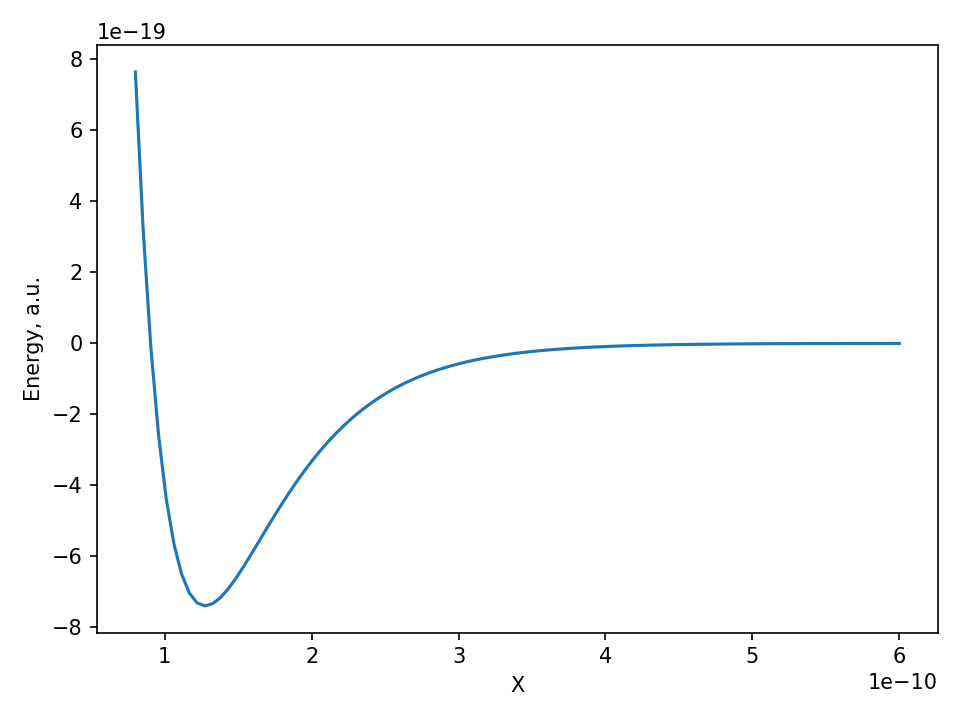

In [18]:
%matplotlib notebook
D = 7.400822618528463e-19

alpha = 1.86755e+10 
x0 = 1.275e-10 
q0 = 1.27455e-10
p0 = 0.0
M = 1.0
dt = 0.01
nsteps = 10000
x = np.linspace(0.08e-9, 0.6e-9, 100)

energy = D *  ( np.exp(-2*alpha*(x-q0)) - 2*np.exp(-alpha*(x-q0) ) )

plt.plot(x, energy)

plt.xlabel('X')
plt.ylabel('Energy, a.u.')
plt.tight_layout()


## Part 2: Plots of the energy conservation and phase space diagram

<IPython.core.display.Javascript object>


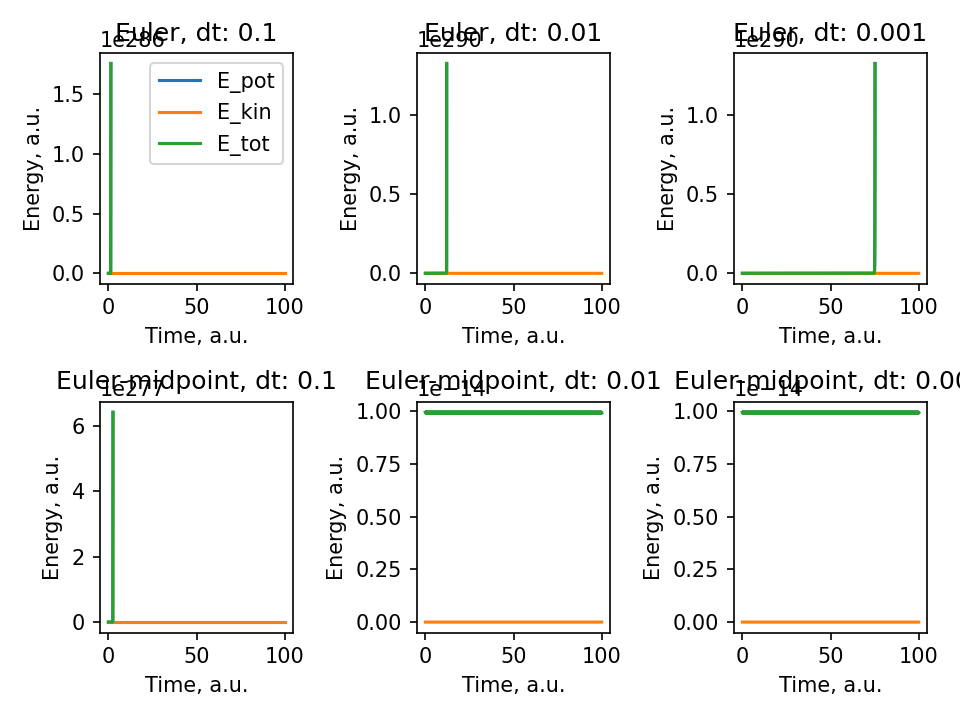

C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in double_scalars
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in exp
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2


In [19]:
%matplotlib notebook
dt_values = [0.1, 0.01, 0.001]

for c, dt in enumerate(dt_values):
    plt.subplot(2,3,c+1)
    nsteps = int(100/dt)
    X_euler, P_euler, T_euler, E_pot_euler, E_kin_euler, E_tot_euler = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    plt.plot(T_euler, E_pot_euler, label='E_pot')
    plt.plot(T_euler, E_kin_euler, label='E_kin')
    plt.plot(T_euler, E_tot_euler, label='E_tot')
    plt.title(F'Euler, dt: {dt}')
    plt.ylabel('Energy, a.u.')
    plt.xlabel('Time, a.u.')

for c, dt in enumerate(dt_values):
    plt.subplot(2,3,c+4)
    nsteps = int(100/dt)
    X_midpoint, P_midpoint, T_midpoint, E_pot_midpoint, E_kin_midpoint, E_tot_midpoint = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler-midpoint')
    plt.plot(T_midpoint, E_pot_midpoint, label='E_pot')
    plt.plot(T_midpoint, E_kin_midpoint, label='E_kin')
    plt.plot(T_midpoint, E_tot_midpoint, label='E_tot')
    plt.title(F'Euler-midpoint, dt: {dt}')
    plt.ylabel('Energy, a.u.')
    plt.xlabel('Time, a.u.')

plt.subplot(2,3,1)
plt.legend()
plt.tight_layout()


# Phase diagram

<IPython.core.display.Javascript object>


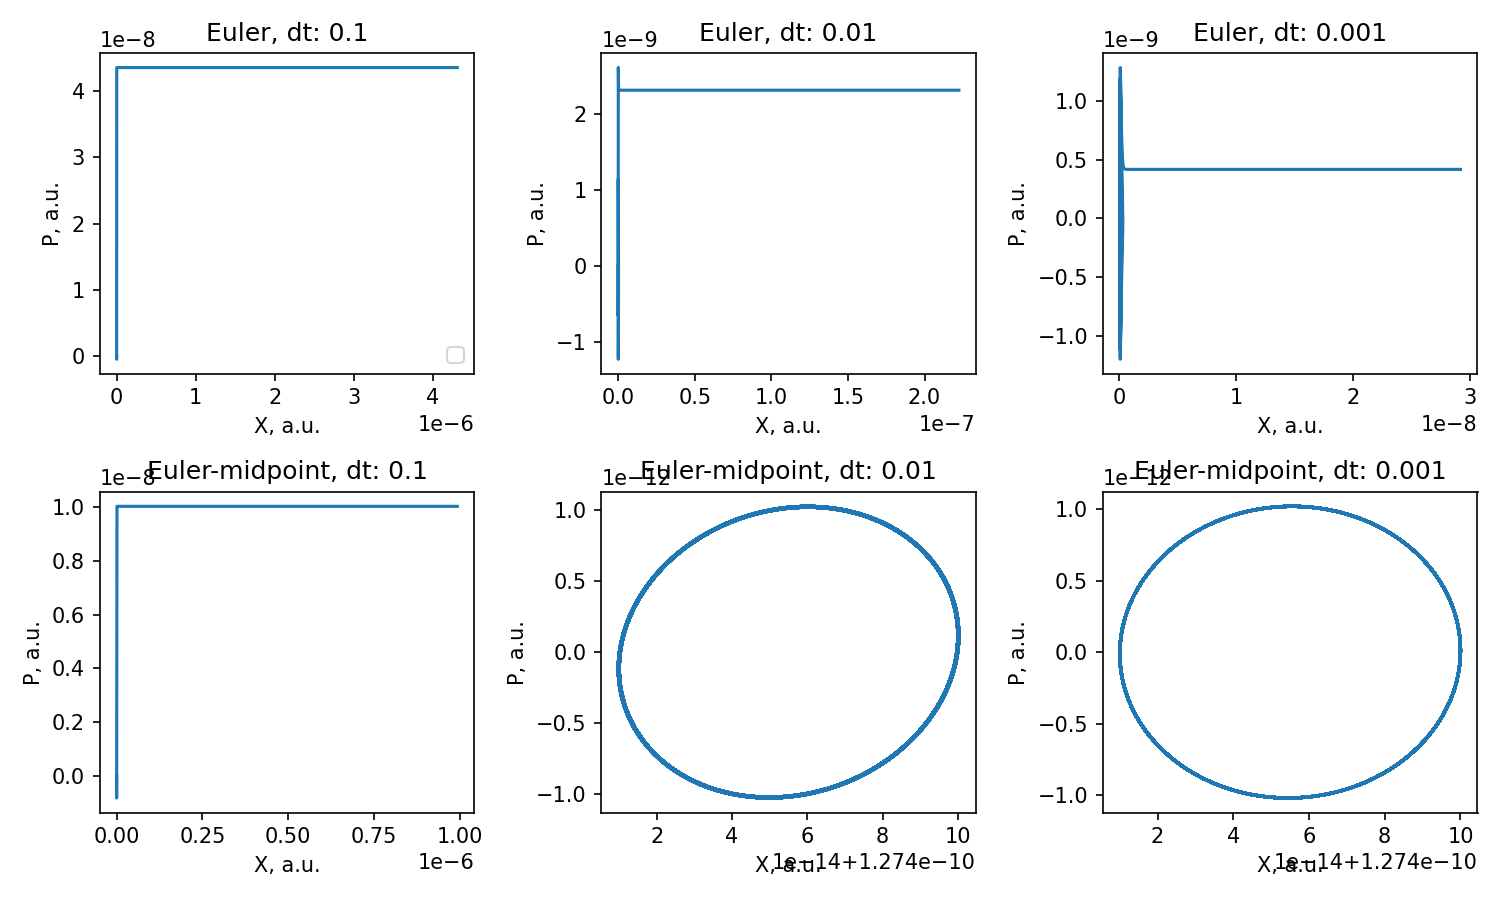

C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in double_scalars
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in exp
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [20]:
import matplotlib.pyplot as plt

dt_values = [0.1, 0.01, 0.001]
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, dt in enumerate(dt_values):
    nsteps = int(100 / dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    ax = axes[i]
    ax.plot(X, P)
    ax.set_title(F'Euler, dt: {dt}')
    ax.set_xlabel('X, a.u.')
    ax.set_ylabel('P, a.u.')

for i, dt in enumerate(dt_values):
    j = i + 3
    nsteps = int(100 / dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler-midpoint')
    ax = axes[j]
    ax.plot(X, P)
    ax.set_title(F'Euler-midpoint, dt: {dt}')
    ax.set_xlabel('X, a.u.')
    ax.set_ylabel('P, a.u.')

axes[0].legend()
fig.tight_layout()
plt.show()


# Bound and unbounded dynamics

C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in double_scalars
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in exp
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2


<IPython.core.display.Javascript object>


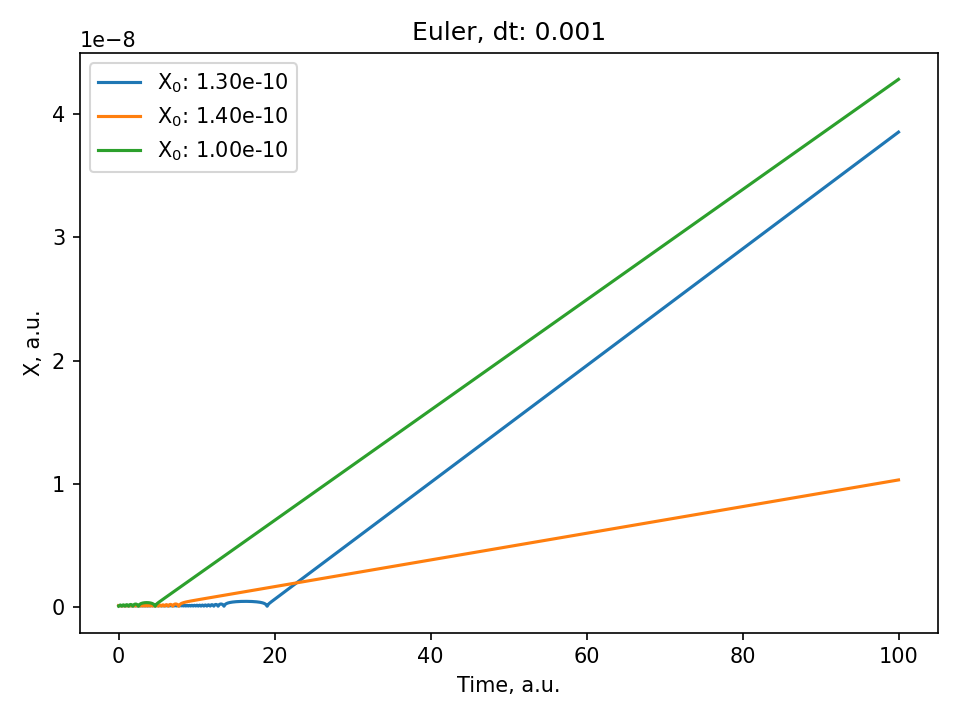

In [21]:
%matplotlib notebook

dt = 0.001
nsteps = 100000
x0_values = [1.3e-10, 1.4e-10, 1e-10]
for x0 in x0_values:
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    plt.plot(T, X, label=F'X$_0$: {x0:.2e}')
plt.title(f'Euler, dt: {dt}')
plt.ylabel('X, a.u.')
plt.xlabel('Time, a.u.')
plt.legend()
plt.tight_layout()


# Verlet algorithm testing


C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in double_scalars
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2
C:\Users\aoben\AppData\Local\Temp\ipykernel_30024\2680602078.py:8: RuntimeWarning: overflow encountered in exp
  energy = D *  ( 1 - np.exp(-alpha*(-q-q0) ) )**2


<IPython.core.display.Javascript object>


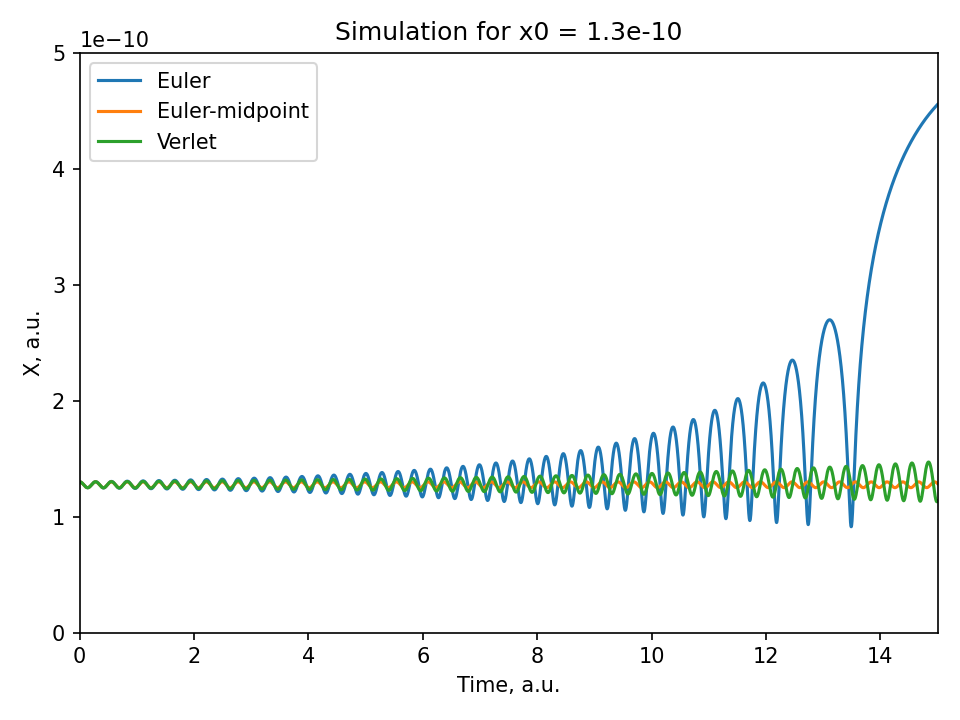

In [22]:
%matplotlib notebook

x0 = 1.3e-10
methods = ['Euler', 'Euler-midpoint', 'Verlet']

for method in methods:
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method=method)
    plt.plot(T, X, label=method)

plt.title(f"Simulation for x0 = {x0}")
plt.ylabel('X, a.u.')
plt.xlabel('Time, a.u.')
plt.ylim(0,0.05e-8)
plt.xlim(0,15)
plt.legend()
plt.tight_layout()
